In [1]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cell_size = (2,2,0)

boundary_layer = [
    mp.PML(0.3, mp.X),
    mp.PML(0.3, mp.Y)
                  ]

In [3]:
lambda_min = 0.4
lambda_max = 0.7
fmin = 1 / lambda_min
fmax = 1 / lambda_max
fcen = 0.5 * (fmin+fmax) 
df = fmax - fmin
resolution = 100
nfreq = 50

In [12]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.GaussianSource(frequency=fcen, fwidth=df),
    component=mp.Ey,
    center=source_center
)]

In [13]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [14]:
offset = 0.01
flux_size_x = 0.02
flux_size_y = 0.02

box_power = sim.add_flux(
    fcen, df, nfreq,
    mp.FluxRegion(
        center=source_center - mp.Vector3(offset, 0, 0),
        size=mp.Vector3(0, flux_size_y, 0),
        direction=mp.Y,
        weight=-1
    ),
    mp.FluxRegion(
        center=source_center + mp.Vector3(offset, 0, 0),
        size=mp.Vector3(0, flux_size_x, 0),
        direction=mp.Y
    ),
    mp.FluxRegion(
        center=source_center - mp.Vector3(0, offset, 0),
        size=mp.Vector3(flux_size_y, 0),
        direction=mp.Y,
        weight=-1
    ),
    mp.FluxRegion(
        center=source_center + mp.Vector3(0, offset, 0),
        size=mp.Vector3(flux_size_y, 0),
        direction=mp.Y
    )
)

아래는 continuous source로 데이터 출력하는 경우

In [6]:
sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(), 1e-8))

Px1 = mp.get_fluxes(flux_x1)
Px2 = mp.get_fluxes(flux_x2)

Py1 = mp.get_fluxes(flux_y1)
Py2 = mp.get_fluxes(flux_y2)

freqs = mp.get_flux_freqs(flux_x1)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000118017 s
Working in 2D dimensions.
Computational cell is 2 x 2 x 0 with resolution 100
time for set_epsilon = 0.0217481 s
-----------
run 0 finished at t = 50.005 (10001 timesteps)


NameError: name 'flux_x1' is not defined

In [20]:
sim.run(until=5)

# freqs = mp.get_flux_freqs(box_power)
box_po = mp.get_dft_flux_array(box_power)

on time step 4000 (time=20), 0.0284929 s/step
run 4 finished at t = 25.0 (5000 timesteps)


TypeError: get_dft_flux_array() missing 3 required positional arguments: 'dft', 'c', and 'num_freq'

In [16]:
box_po

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

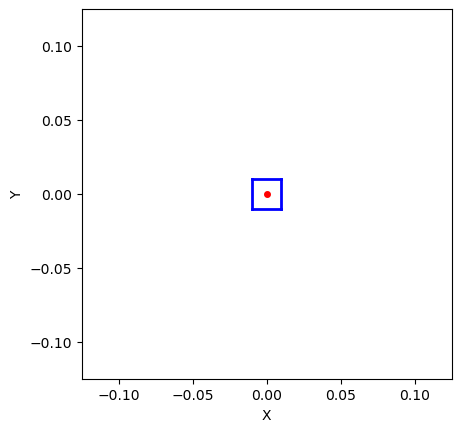

In [9]:
sim.plot2D(
    output_plane=mp.Volume(center = mp.Vector3(0,0,0), size = mp.Vector3(0.25,0.25,0))
)
plt.show()

In [41]:
Px1 = np.array(Px1)
Px2 = np.array(Px2)
Py1 = np.array(Py1)
Py2 = np.array(Py2)




NameError: name 'Px1' is not defined

In [25]:
net_power = (Px1+Px2+Py1+Py2)
print(net_power)
print(freqs)


NameError: name 'Px1' is not defined

In [10]:
freqs = mp.get_flux_freqs(box_power)

wavelengths = [1/f for f in freqs]

# ------------Homogeneous dipole sourcepower------------

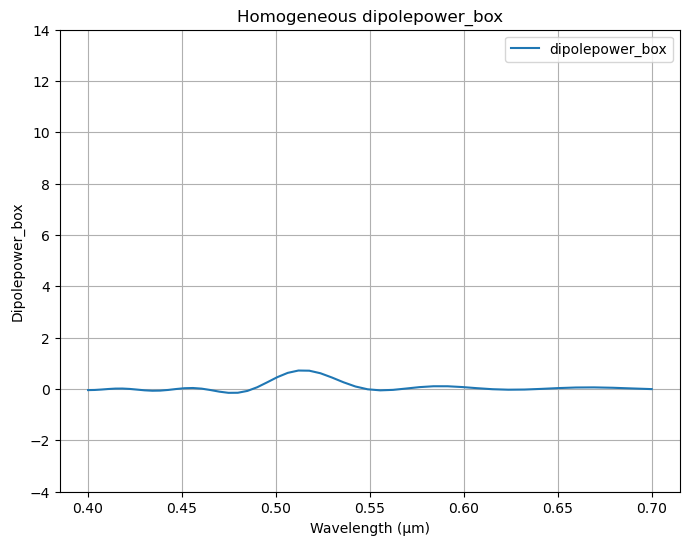

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(wavelengths, box_po, '-', label='dipolepower_box')
plt.xlabel('Wavelength (μm)')
plt.ylabel('Dipolepower_box')
plt.title('Homogeneous dipolepower_box')
plt.ylim(-4, 14)  # y축 최소값: -4, 최대값: 14
plt.legend()
plt.grid(True)
plt.show()